# features in dataset
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [3]:
#import libraries
from sklearn.datasets import load_boston # dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
#plotting library like matplotlib

%matplotlib inline

In [4]:
# instantiate dataset and create DataFrame 
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
display(df)
print("====================================================================")
display("target",target)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


'target'

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
full_data = pd.concat([df,target],axis = 1)
full_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Per capita crime rate.
Proportion of residential land zoned for lots over 25,000 square feet.
Proportion of non-retail business acres per town.
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
Nitric oxides concentration (parts per 10 million).
Average number of rooms per dwelling.
Proportion of owner-occupied units built prior to 1940.
Weighted distances to five Boston employment centres.
Index of accessibility to radial highways.
Full-value property-tax rate per $10,000.
Pupil-teacher ratio by town.
1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
% lower status of the population.

In [7]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


/home/pradip/miniconda3/envs/bellora/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


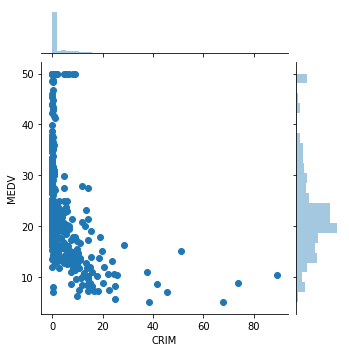

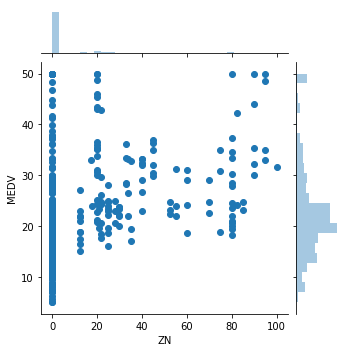

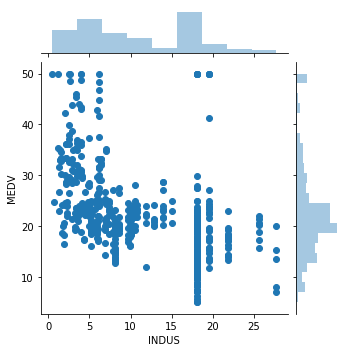

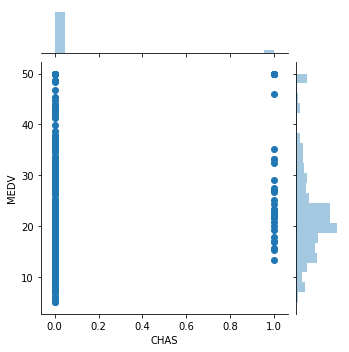

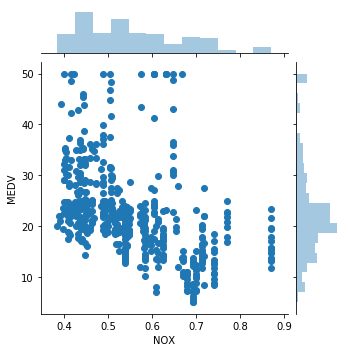

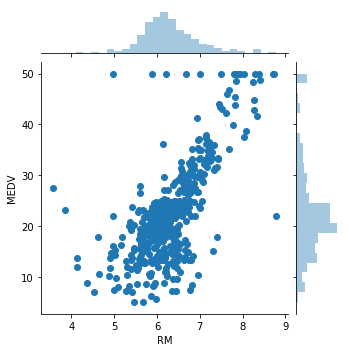

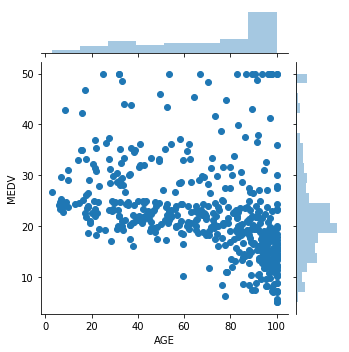

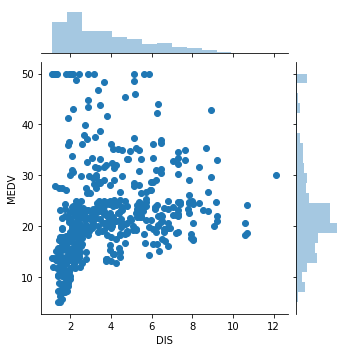

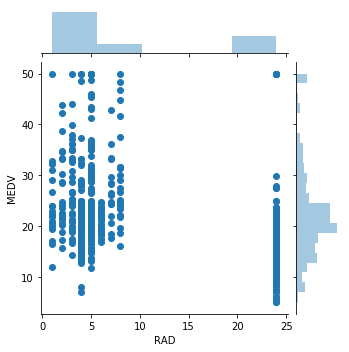

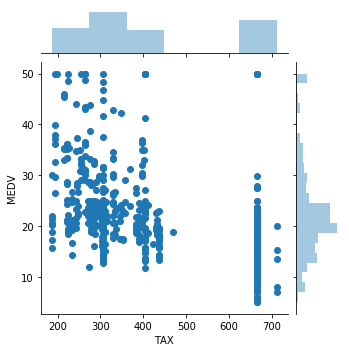

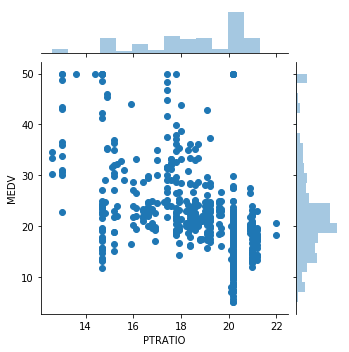

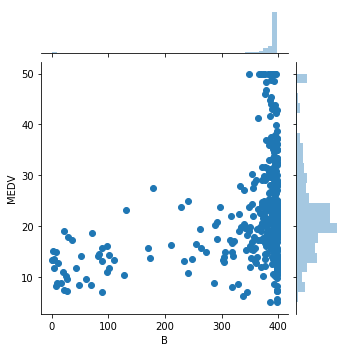

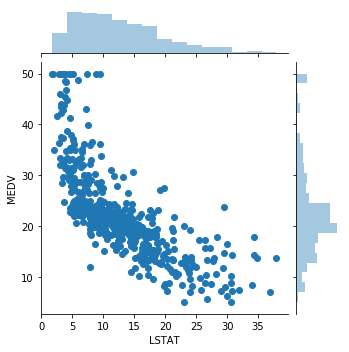

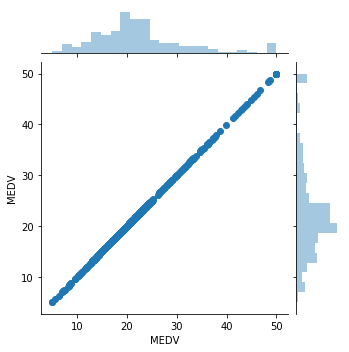

In [22]:
def print_allpairs():
    for i in full_data:
        sns.jointplot(x=i,y="MEDV",data=full_data, height=5)
print_allpairs()

In [10]:
#sns.pairplot(full_data,height=3)

In [11]:
# Basic exploratory analyses 
print("Rows,Columns:",df.shape)
df.describe()

Rows,Columns: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
# split dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.30)


In [13]:
# checking shape after spliting data


In [14]:
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)

print("X_test shape:",X_test.shape)
print("Y_test:",Y_test.shape)



X_train shape: (354, 13)
Y_train shape: (354, 1)
X_test shape: (152, 13)
Y_test: (152, 1)


In [15]:
# mean of X and Y
mean_x=np.mean(X_train)
mean_y=np.mean(Y_train)
length=len(X_train)
print(mean_x)
print(mean_y)
print(length)

CRIM         3.950520
ZN          10.502825
INDUS       11.393220
CHAS         0.062147
NOX          0.557632
RM           6.274932
AGE         69.481356
DIS          3.703096
RAD          9.717514
TAX        410.194915
PTRATIO     18.446045
B          353.183107
LSTAT       12.622119
dtype: float64
MEDV    22.308192
dtype: float64
354


In [16]:
print(X_train.iloc[0])
print(mean_x)
print(Y_train.iloc[0])
print(mean_y)

CRIM         0.66351
ZN          20.00000
INDUS        3.97000
CHAS         0.00000
NOX          0.64700
RM           7.33300
AGE        100.00000
DIS          1.89460
RAD          5.00000
TAX        264.00000
PTRATIO     13.00000
B          383.29000
LSTAT        7.79000
Name: 258, dtype: float64
CRIM         3.950520
ZN          10.502825
INDUS       11.393220
CHAS         0.062147
NOX          0.557632
RM           6.274932
AGE         69.481356
DIS          3.703096
RAD          9.717514
TAX        410.194915
PTRATIO     18.446045
B          353.183107
LSTAT       12.622119
dtype: float64
MEDV    36.0
Name: 258, dtype: float64
MEDV    22.308192
dtype: float64


In [17]:
yme=((Y_train.iloc[0] - mean_y))
yme

MEDV    13.691808
dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
#traning error
reg.score(X_train, Y_train)
reg.score(X_test,Y_test)

0.6543471274997794

In [19]:
# testing error
print(reg.score(X_test,Y_test))

0.6543471274997794


In [20]:
reg.coef_

array([[-1.26913348e-01,  4.83989075e-02,  7.24252455e-02,
         4.97601635e+00, -1.17573648e+01,  4.23864157e+00,
        -1.99983996e-02, -1.51492268e+00,  3.04945909e-01,
        -1.44779817e-02, -7.80618959e-01,  7.29201542e-03,
        -5.40639754e-01]])

In [21]:
reg.intercept_ 

array([29.74876966])